In [1]:
import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
movie=pd.read_csv('movies.csv')

In [3]:
movie.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [4]:
movie.shape

(4803, 24)

In [5]:
movie.isna().sum()

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

In [6]:
selected_features = ['genres','keywords','tagline','cast','director']

In [7]:
print(selected_features)

['genres', 'keywords', 'tagline', 'cast', 'director']


In [8]:
for feture in selected_features:
    movie[feture]=movie[feture].fillna('')

In [9]:
movie.isna().sum()

index                      0
budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                    0
title                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
director                   0
dtype: int64

In [10]:
compain=movie['genres']+" "+['keywords']+" "+['tagline']+" "+['cast']+" "+['director']

In [11]:
compain.head()

0    Action Adventure Fantasy Science Fiction keywo...
1    Adventure Fantasy Action keywords tagline cast...
2    Action Adventure Crime keywords tagline cast d...
3    Action Crime Drama Thriller keywords tagline c...
4    Action Adventure Science Fiction keywords tagl...
Name: genres, dtype: object

In [12]:
vectorized=TfidfVectorizer()

In [13]:
feature_vectors=vectorized.fit_transform(compain)

In [14]:
print(feature_vectors)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 31869 stored elements and shape (4803, 26)>
  Coords	Values
  (0, 0)	0.3428146609317517
  (0, 1)	0.3961809909951843
  (0, 10)	0.48596434970205704
  (0, 20)	0.4524925628205004
  (0, 11)	0.4524925628205004
  (0, 15)	0.14129609214982725
  (0, 21)	0.14129609214982725
  (0, 3)	0.14129609214982725
  (0, 6)	0.14129609214982725
  (1, 0)	0.4461173177836259
  (1, 1)	0.5155648844750456
  (1, 10)	0.6324032689801039
  (1, 15)	0.18387379778876506
  (1, 21)	0.18387379778876506
  (1, 3)	0.18387379778876506
  (1, 6)	0.18387379778876506
  (2, 0)	0.4727769452370094
  (2, 1)	0.5463746450475276
  (2, 15)	0.1948619543836292
  (2, 21)	0.1948619543836292
  (2, 3)	0.1948619543836292
  (2, 6)	0.1948619543836292
  (2, 5)	0.5710271291600073
  (3, 0)	0.4672690252002193
  (3, 15)	0.19259178433035043
  :	:
  (4798, 22)	0.4778919419803599
  (4799, 15)	0.2555661153378224
  (4799, 21)	0.2555661153378224
  (4799, 3)	0.2555661153378224
  (4799, 6)	0.2555661153

In [15]:
similarity = cosine_similarity(feature_vectors)

In [16]:
print(similarity)

[[1.         0.7684406  0.48867105 ... 0.05068858 0.28259218 0.10931628]
 [0.7684406  1.         0.63592559 ... 0.06596291 0.3677476  0.1422573 ]
 [0.48867105 0.63592559 1.         ... 0.06990481 0.38972391 0.15075848]
 ...
 [0.05068858 0.06596291 0.06990481 ... 1.         0.17937007 0.06938645]
 [0.28259218 0.3677476  0.38972391 ... 0.17937007 1.         0.38683406]
 [0.10931628 0.1422573  0.15075848 ... 0.06938645 0.38683406 1.        ]]


In [17]:
print(similarity.shape)

(4803, 4803)


In [18]:
movie_name = input(' Enter your favourite movie name : ')

 Enter your favourite movie name :  Spectre


In [19]:
list_of_all_titles = movie['title'].tolist()
print(list_of_all_titles)

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

In [20]:
find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)
print(find_close_match)

['Spectre', 'Sphere', 'Species']


In [21]:
close_match = find_close_match[0]
print(close_match)

Spectre


In [22]:
index_of_the_movie = movie[movie.title == close_match]['index'].values[0]
print(index_of_the_movie)

2


In [23]:
similarity_score = list(enumerate(similarity[index_of_the_movie]))
print(similarity_score)

[(0, np.float64(0.4886710471596852)), (1, np.float64(0.6359255938613295)), (2, np.float64(1.0)), (3, np.float64(0.6933024646228871)), (4, np.float64(0.5591338606543207)), (5, np.float64(0.6359255938613295)), (6, np.float64(0.14080316432599604)), (7, np.float64(0.5591338606543207)), (8, np.float64(0.3952815578603119)), (9, np.float64(0.6359255938613295)), (10, np.float64(0.4886710471596852)), (11, np.float64(0.9099864402070972)), (12, np.float64(0.6359255938613295)), (13, np.float64(0.5238764314555898)), (14, np.float64(0.4886710471596852)), (15, np.float64(0.3952815578603119)), (16, np.float64(0.5591338606543207)), (17, np.float64(0.6359255938613295)), (18, np.float64(0.32799038102961375)), (19, np.float64(0.6359255938613295)), (20, np.float64(0.6359255938613295)), (21, np.float64(0.8209311894204534)), (22, np.float64(0.47488684383719854)), (23, np.float64(0.47488684383719854)), (24, np.float64(0.7589262431076204)), (25, np.float64(0.17563469789872255)), (26, np.float64(0.5591338606543

In [24]:
len(similarity_score)

4803

In [25]:
sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 
print(sorted_similar_movies)

[(2, np.float64(1.0)), (1234, np.float64(1.0)), (1542, np.float64(1.0)), (1740, np.float64(1.0)), (1615, np.float64(0.9471890675999715)), (3035, np.float64(0.9301764905682345)), (3148, np.float64(0.9301764905682345)), (3318, np.float64(0.9301764905682345)), (11, np.float64(0.9099864402070972)), (731, np.float64(0.9099864402070972)), (840, np.float64(0.9099864402070972)), (873, np.float64(0.9099864402070972)), (969, np.float64(0.9099864402070972)), (984, np.float64(0.9099864402070972)), (1058, np.float64(0.9099864402070972)), (1073, np.float64(0.9099864402070972)), (1076, np.float64(0.9099864402070972)), (1082, np.float64(0.9099864402070972)), (3799, np.float64(0.9099864402070972)), (3352, np.float64(0.8872224432281837)), (1084, np.float64(0.8696509902447962)), (2250, np.float64(0.8696509902447962)), (164, np.float64(0.8564281118110497)), (186, np.float64(0.8564281118110497)), (350, np.float64(0.8564281118110497)), (683, np.float64(0.8564281118110497)), (711, np.float64(0.85642811181104

In [26]:
# print the name of similar movies based on the index

print('Movies suggested for you : \n')

i = 1

for movies in sorted_similar_movies:
  index = movies[0]
  title_from_index = movie[movie.index==index]['title'].values[0]
  if (i<10):
    print(i, '.',title_from_index)
    i+=1

Movies suggested for you : 

1 . Spectre
2 . The Art of War
3 . Speed
4 . Kick-Ass 2
5 . Gridiron Gang
6 . Reno 911!: Miami
7 . It's a Mad, Mad, Mad, Mad World
8 . Witless Protection
9 . Quantum of Solace


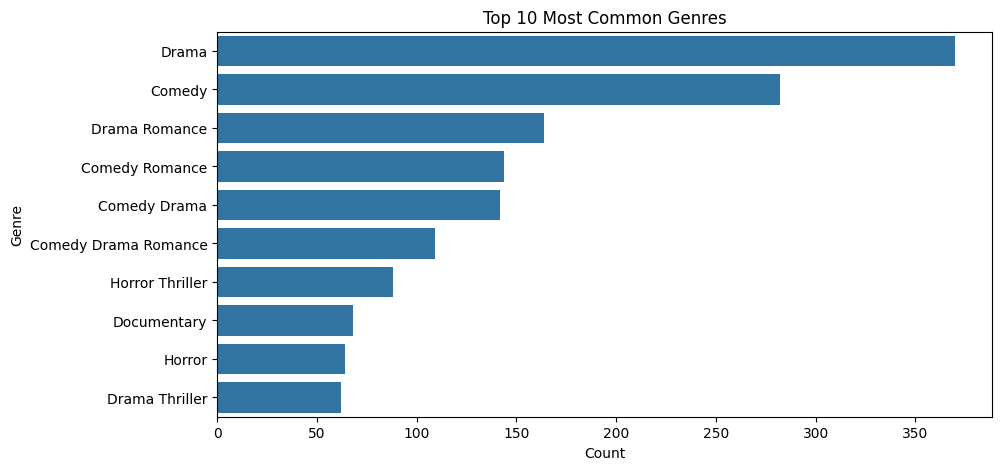

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Split and explode genres for frequency count
movie['genre_list'] = movie['genres'].str.split(',')
genre_exploded = movie.explode('genre_list')

plt.figure(figsize=(10, 5))
sns.countplot(data=genre_exploded, y='genre_list', order=genre_exploded['genre_list'].value_counts().index[:10])
plt.title('Top 10 Most Common Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


C:\Users\azhag\AppData\Local\Temp\ipykernel_37972\3912130346.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=genre_exploded, y='genre_list',


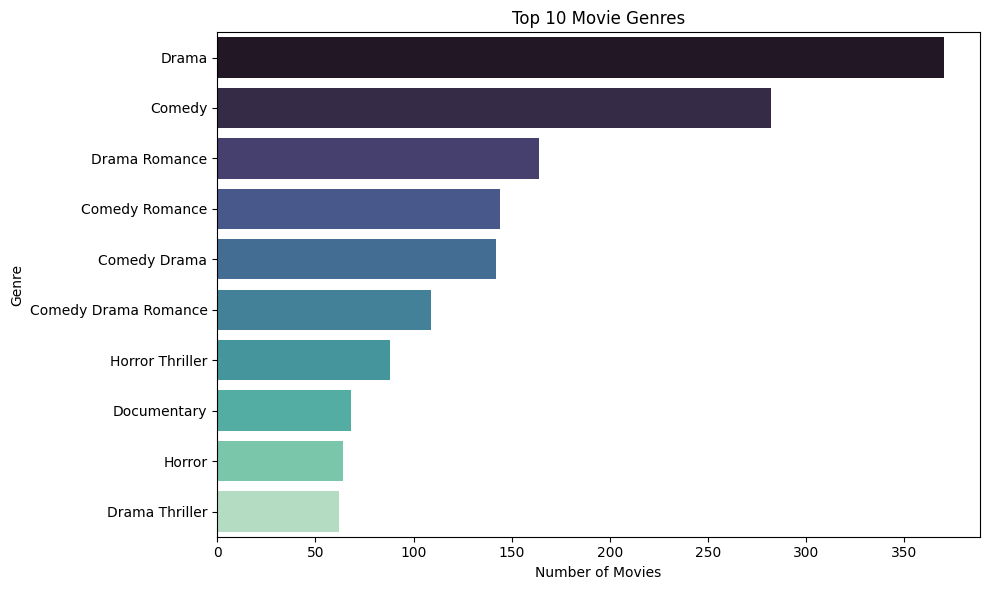

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Split genres into list
movie['genre_list'] = movie['genres'].str.split(',')

# Explode list into individual rows
genre_exploded = movie.explode('genre_list')

# Strip extra whitespace
genre_exploded['genre_list'] = genre_exploded['genre_list'].str.strip()

# Count and plot top 10 genres
plt.figure(figsize=(10, 6))
sns.countplot(data=genre_exploded, y='genre_list',
              order=genre_exploded['genre_list'].value_counts().index[:10],
              palette='mako')
plt.title('Top 10 Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


C:\Users\azhag\AppData\Local\Temp\ipykernel_37972\2889310449.py:25: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\azhag\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


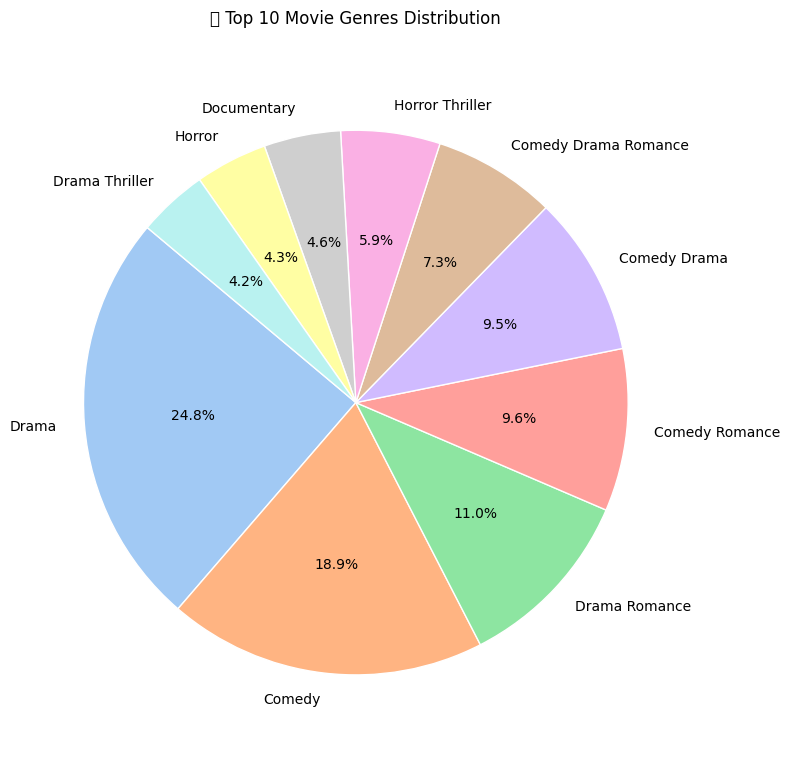

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Split genre strings into lists
movie['genre_list'] = movie['genres'].str.split(',')

# Explode lists to separate rows
genre_exploded = movie.explode('genre_list')

# Clean whitespace
genre_exploded['genre_list'] = genre_exploded['genre_list'].str.strip()

# Count genres
genre_counts = genre_exploded['genre_list'].value_counts()

# Use top 10 genres for clarity
top_genres = genre_counts[:10]

# Seaborn style
sns.set_palette('pastel')
plt.figure(figsize=(8, 8))
plt.pie(top_genres, labels=top_genres.index, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'white'})
plt.title('🎬 Top 10 Movie Genres Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie is a circle
plt.tight_layout()
plt.show()


In [39]:
movie_name = input(' Enter your favourite movie name : ')

list_of_all_titles = movie['title'].tolist()

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)

close_match = find_close_match[0]

index_of_the_movie = movie[movie.title == close_match]['index'].values[0]

similarity_score = list(enumerate(similarity[index_of_the_movie]))

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 

print('Movies suggested for you : \n')

i = 1

for movies in sorted_similar_movies:
  index = movies[0]
  title_from_index = movie[movie.index==index]['title'].values[0]
  if (i<30):
    print(i, '.',title_from_index)
    i+=1

 Enter your favourite movie name :  Spectre


Movies suggested for you : 

1 . Spectre
2 . The Art of War
3 . Speed
4 . Kick-Ass 2
5 . Gridiron Gang
6 . Reno 911!: Miami
7 . It's a Mad, Mad, Mad, Mad World
8 . Witless Protection
9 . Quantum of Solace
10 . The Jackal
11 . Ronin
12 . Shaft
13 . Assassins
14 . Into the Blue
15 . Changing Lanes
16 . The River Wild
17 . Cellular
18 . 16 Blocks
19 . A Lonely Place to Die
20 . Action Jackson
21 . The Glimmer Man
22 . The Proposition
23 . Lethal Weapon 4
24 . Bad Boys II
25 . Charlie's Angels
26 . 3000 Miles to Graceland
27 . RED
28 . Dick Tracy
29 . Johnny English Reborn
